In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
def rl(x):
    return np.maximum(x,0)

def evolve(I, W, b, alpha=0.01):
    steps = len(I[0, :])
    for ii in range(1,steps):
        I[:,ii] = (1-alpha)*I[:,ii-1] + alpha*(W.dot(rl(I[:,ii-1])) + b)

In [3]:
def neuronplot(I, neuron=0, color='k', rl=False):
    X = I[neuron, :]
    if rl:
        X = rl(X)
    plt.plot(X, color=color)
    
def phaseplot(I, neurons=(0,1), color='k', rl=False):
    X = I[neurons[0], :]
    Y = I[neurons[1], :]
    if rl:
        X = rl(X)
        Y = rl(Y)
    plt.plot(X, Y, color=color)
    
def show_neuron_space(W, b, inits, neuron=0):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, neuron=neuron, color=colors[num])
    
def directedphaseplot(I, B, num=200, color='k', neurons=(0,1), withBias=False):
    i1 = neurons[0]; i2 = neurons[1]
    x = I[i1, :]; y = I[i2, :]
    if withBias:
        x += b[i1]; y += b[i2]

    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color=color)
    
def directedphaseplot3D(I, B, ax, num=200, color='k', neurons=(0,1,2), withBias=False):
    i1 = neurons[0]; i2 = neurons[1]; i3 = neurons[2]
    x = I[i1, :]; y = I[i2, :]; z = I[i3, :]
    if withBias:
        x += b[i1]; y += b[i2]; z += b[i3]
    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]; z = z[::skip]
    ax.quiver(x[:-1], y[:-1], z[:-1], (x[1:]-x[:-1]), (y[1:]-y[:-1]), (z[1:]-z[:-1]),
                    color=color)


In [5]:
def show_phase_space(W, b, inits, withBias=False, scheme="2D"):
    if scheme=="2D":
        show_phase_plane(W, b, inits, withBias=withBias)
    elif scheme=="3D":
        show_phase_volume(W, b, inits, withBias=withBias)
    else:
        print "scheme " + scheme + " does not exist."
    

def show_phase_plane(W, b, inits, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axes().set_aspect('equal')
    
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        plt.axes().set_aspect('equal', 'datalim')
        directedphaseplot(I, b, color=colors[num], withBias=withBias)
    
def show_phase_volume(W, b, inits, num=200, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for i, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        directedphaseplot3D(I, b, ax, num=num, color=colors[i], withBias=withBias)

def show_inhibitory_space(W, b, inits):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, neuron=2, color=colors[num])

In [7]:
W = np.zeros([3,3])
steps = 10000
alpha = .01
I = np.zeros([np.shape(W)[0],steps])

In [78]:
W

array([[ 1.4,  0. , -1. ],
       [ 0. ,  1.4, -1. ],
       [ 0.5,  0.5,  0. ]])

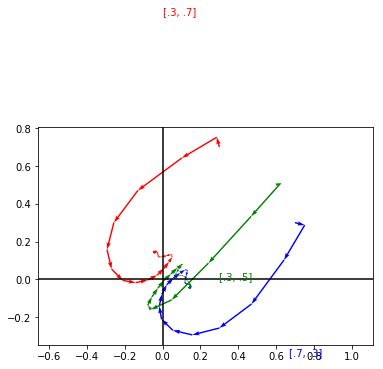

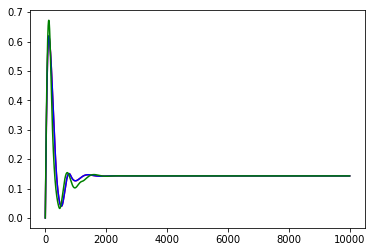

In [100]:
ee = 1.3; ei = 1.0; ie = -1.0
b1 = b2 = .1; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0]]

show_phase_space(W, b, inits)

plt.text(0,1.4,"[.3, .7]",color='r')
plt.text(.67,-.4,"[.7, .3]",color='b')
plt.text(0.3,.0,"[.3, .5]",color='g')
#neuronplot(I, b)

plt.figure()
show_inhibitory_space(W, b, inits)

plt.show()

In [47]:
from numpy.linalg import inv

In [67]:
Wz = np.copy(W)
Wz[:, 0] = 0
inv(Wz)

array([[ 0. ,  0. , -1. ],
       [ 0. ,  1.4, -1. ],
       [ 0. ,  0.5,  0. ]])

In [74]:
def findfixed(W, b, quiet_neuron):
    Wz = np.copy(W)
    Wz[:, quiet_neuron] = 0
    return np.dot(inv(np.eye(3) - Wz), b)

In [77]:
findfixed(W, b, 0)

array([-2. ,  5. ,  2.5])

In [71]:
-np.dot(inv([[ 1.4,  0. , -1. ],
       [ 0. ,  0, -1. ],
       [ 0.5,  0,  0. ]] - np.eye(3)),b),


(array([ 5. , -2. ,  2.5]),)

In [55]:
inv([[ 1.4,  0. , -1. ],
       [ 0. ,  0, -1. ],
       [ 0.5,  0,  0. ]] - np.eye(3)), b

(array([[-10.,  0., 10.],
        [ 5., -1., -4.],
        [-5., -0.,  4.]]), array([ 0.5,  0.5,  0. ]))